<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

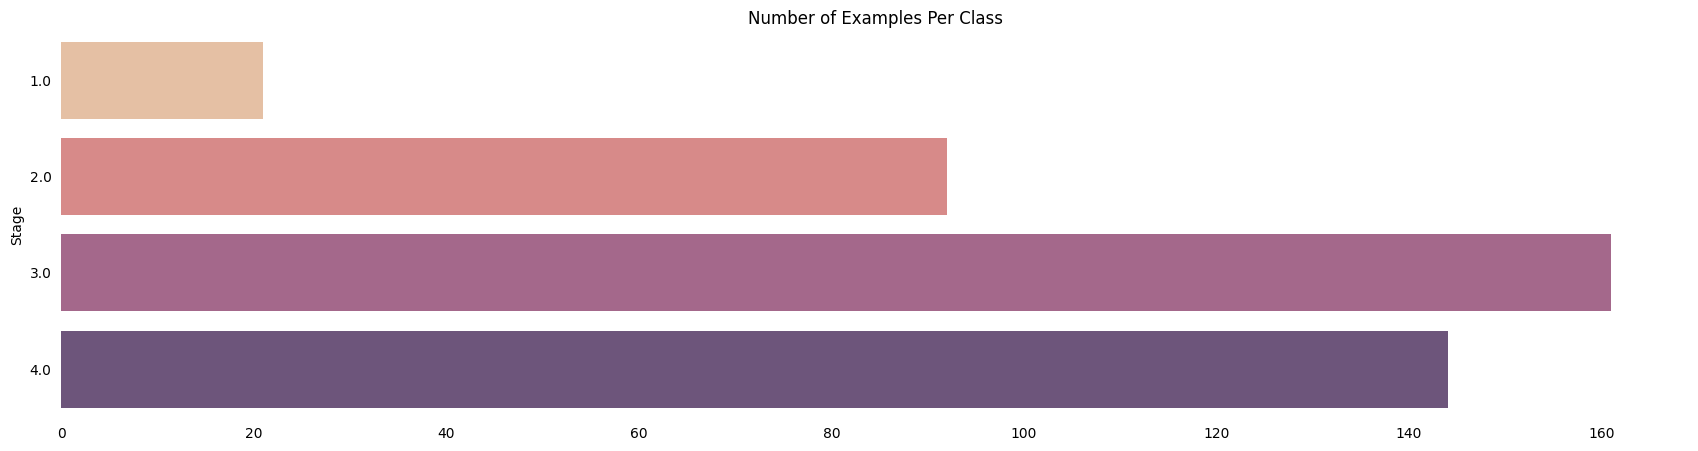

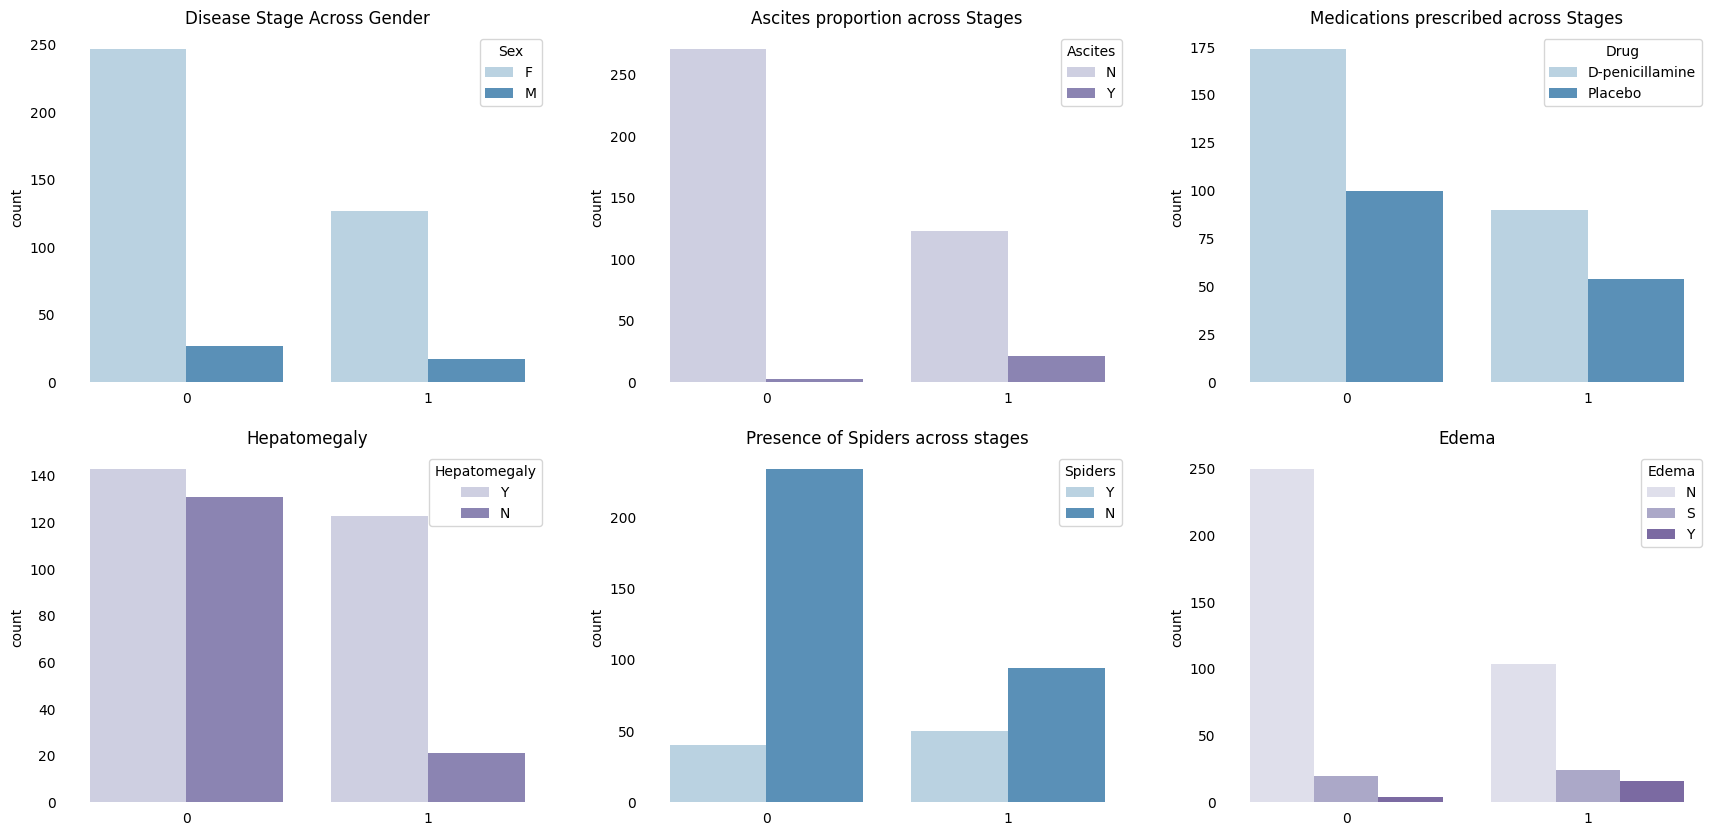

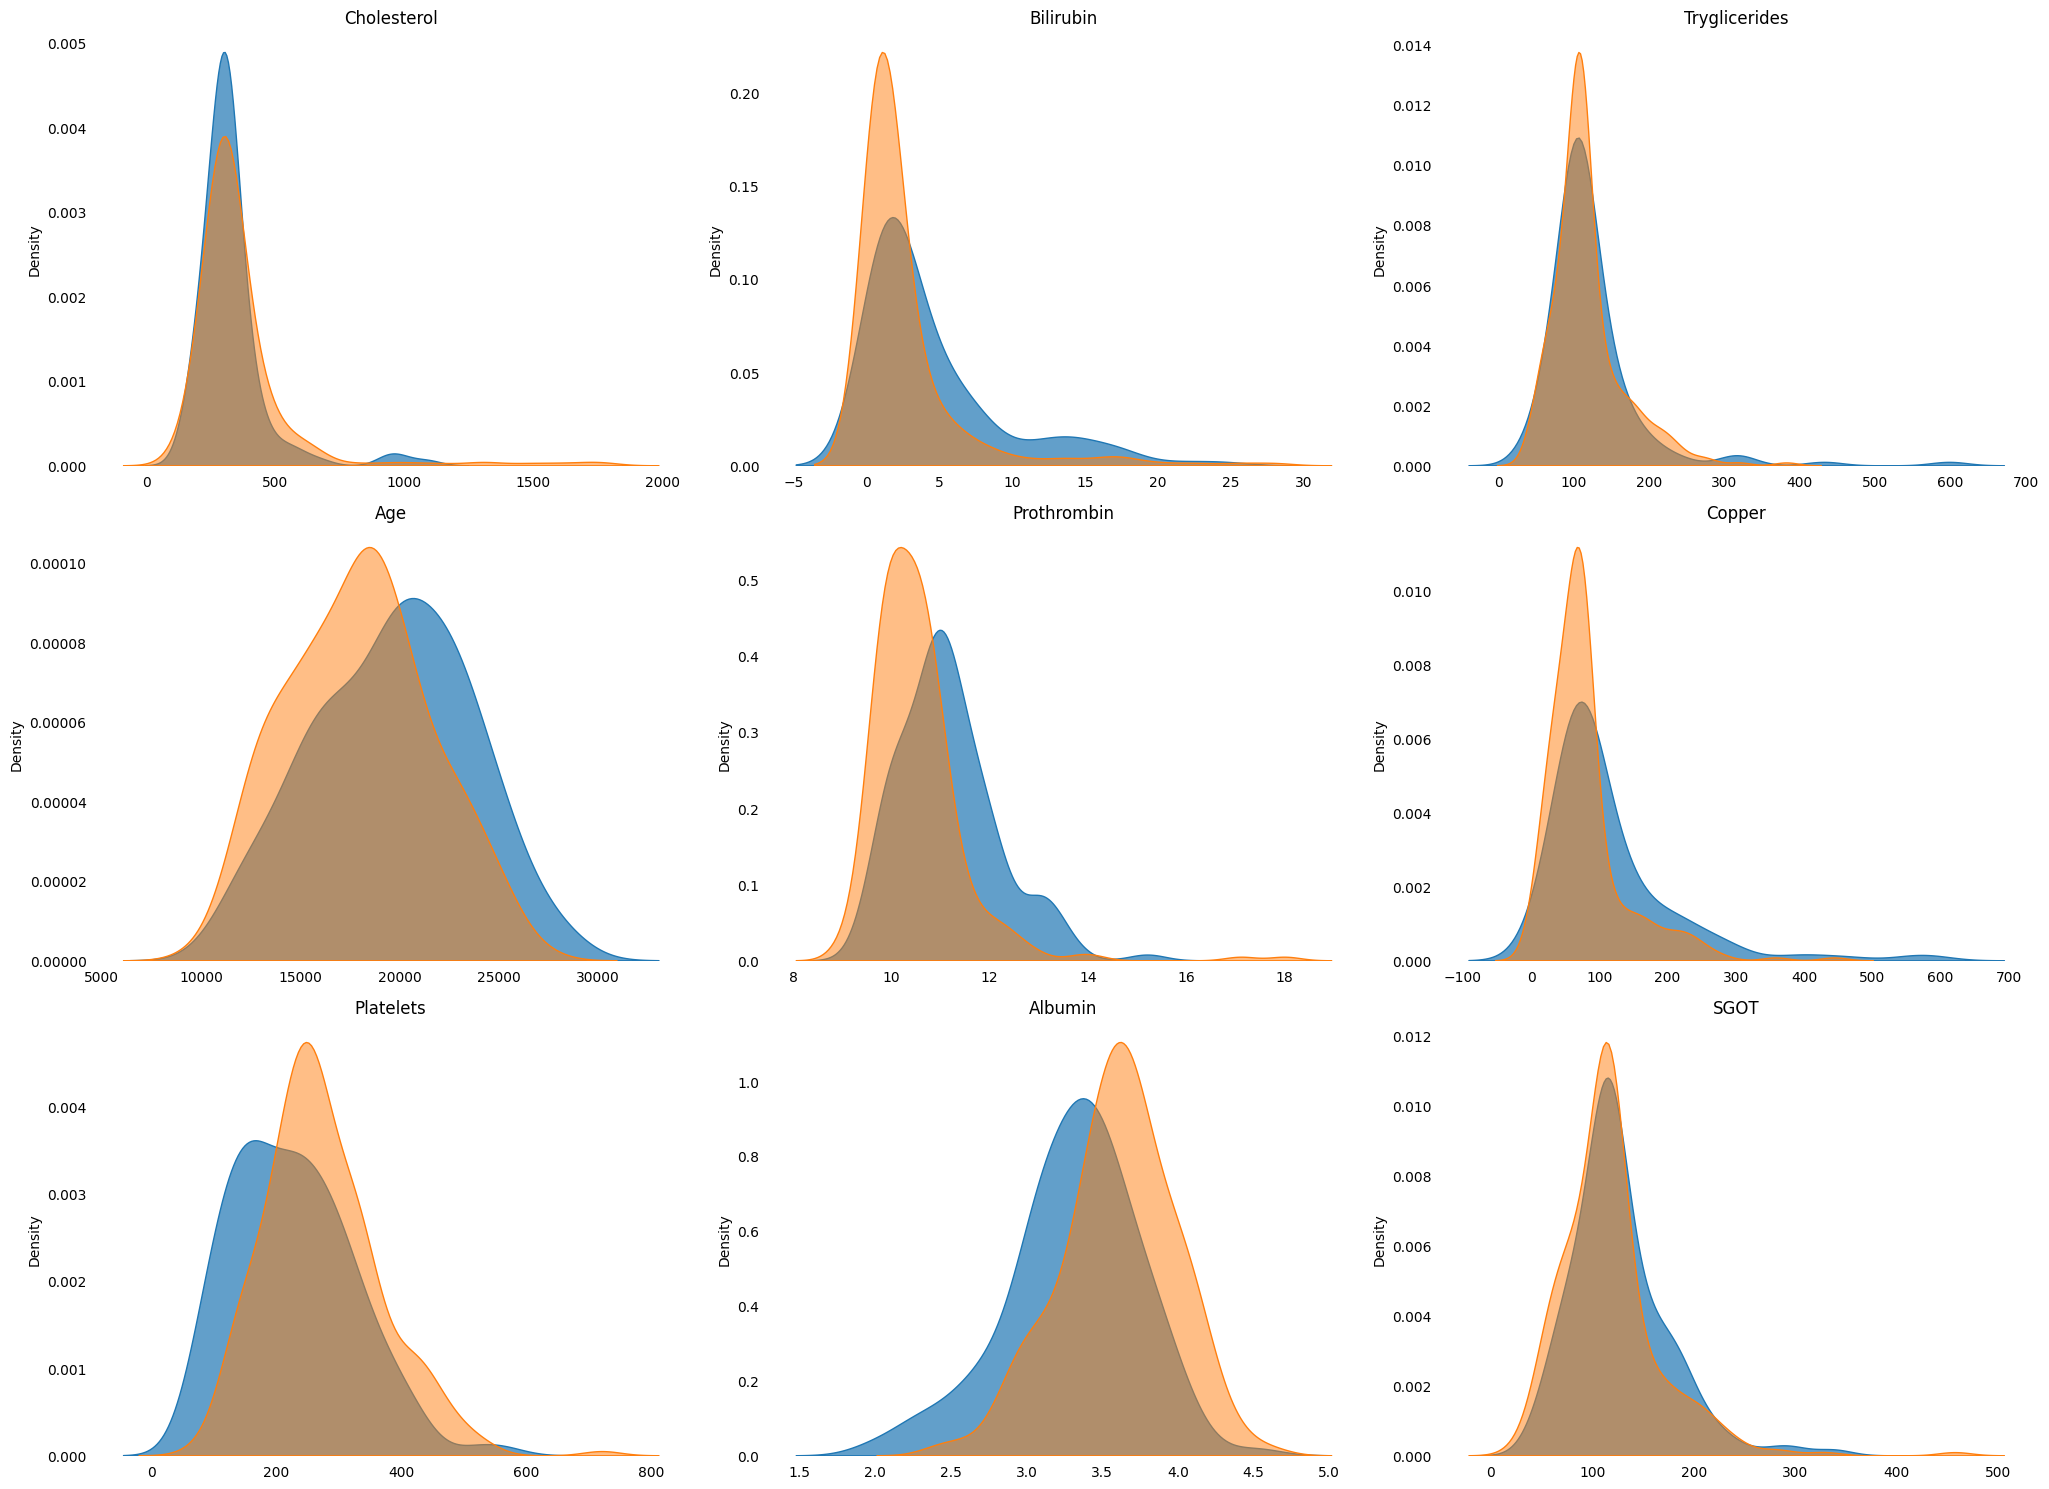

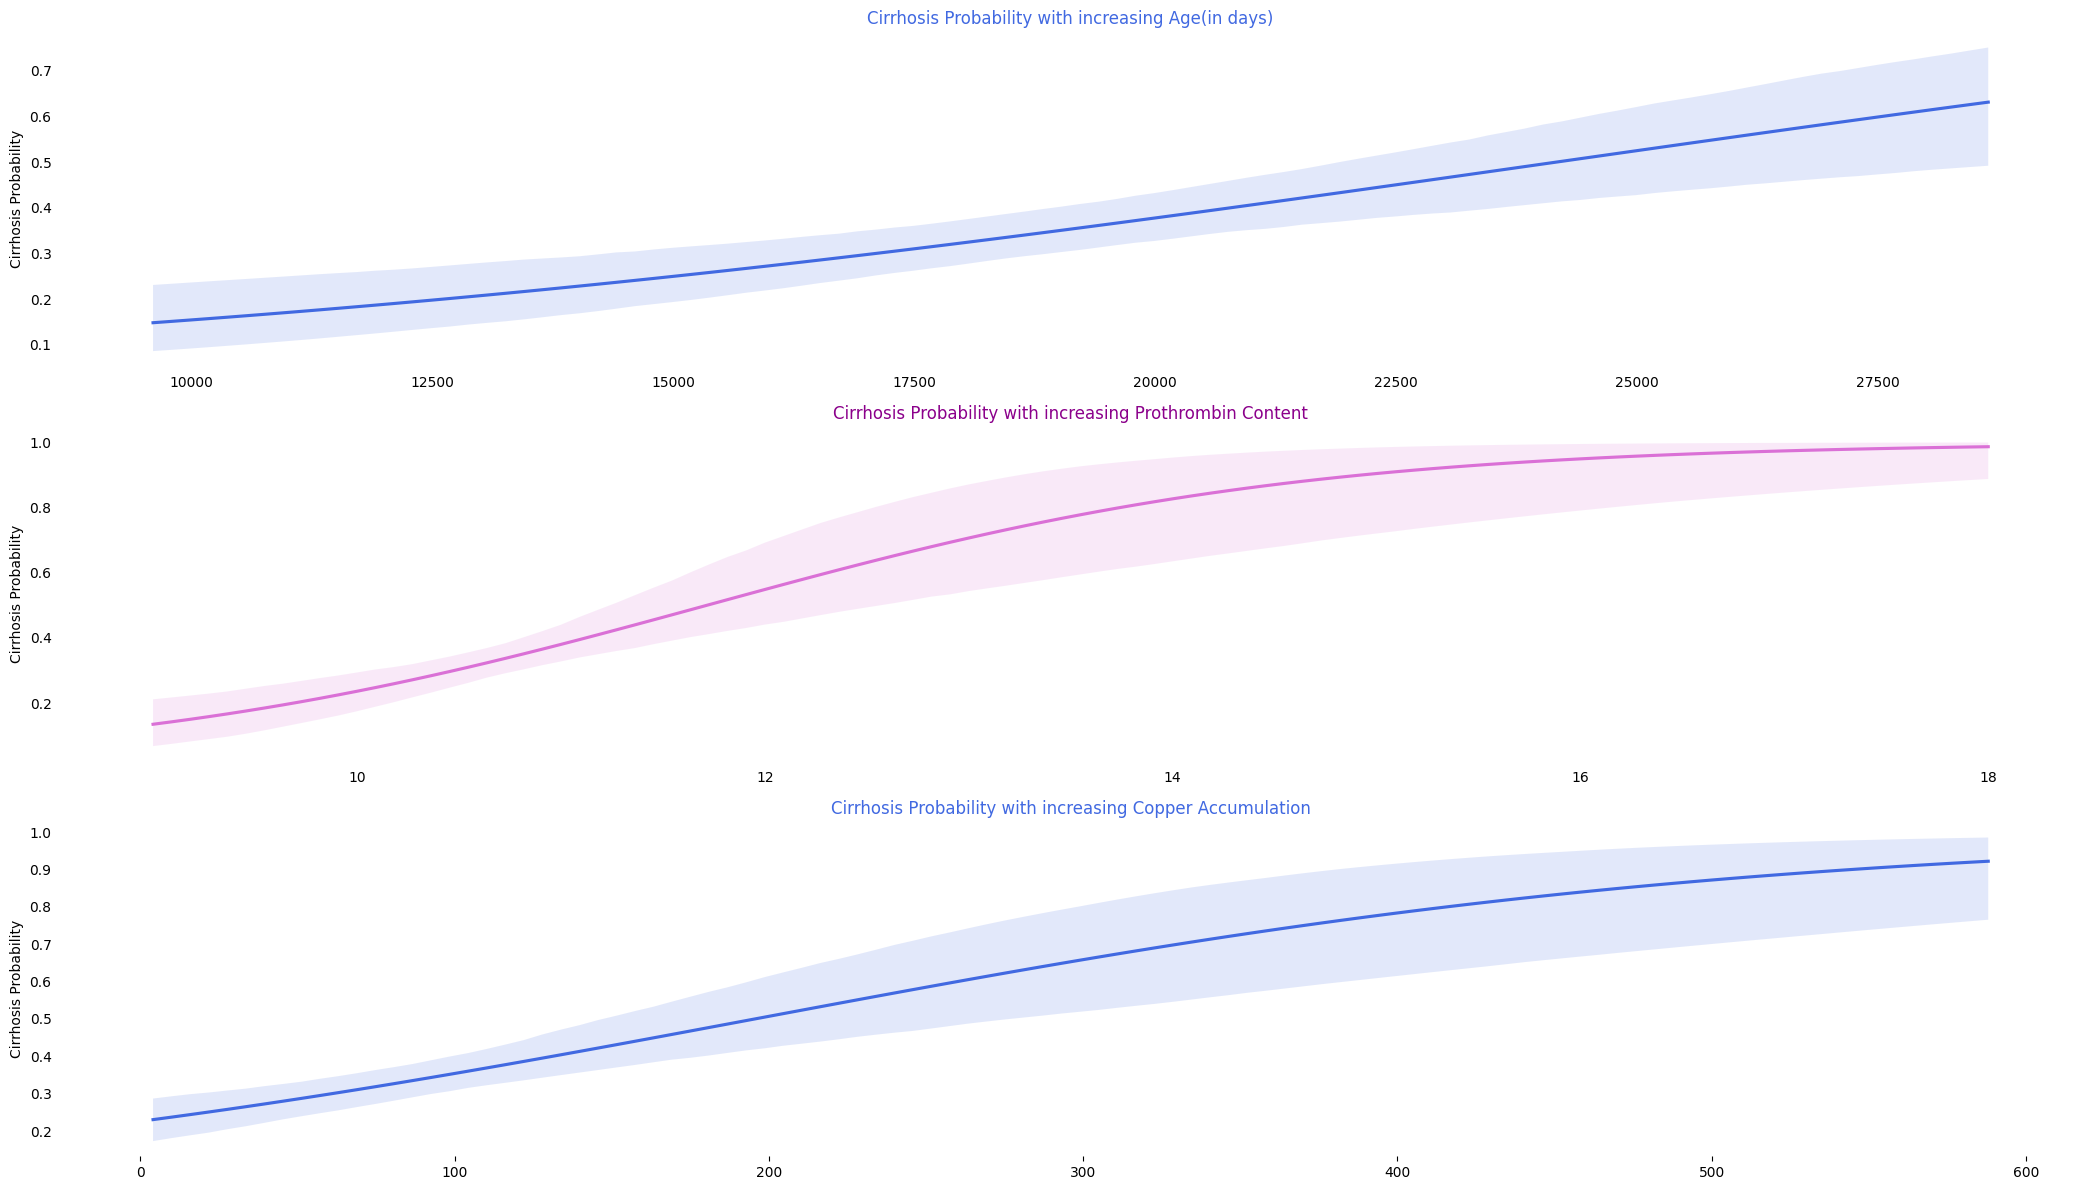

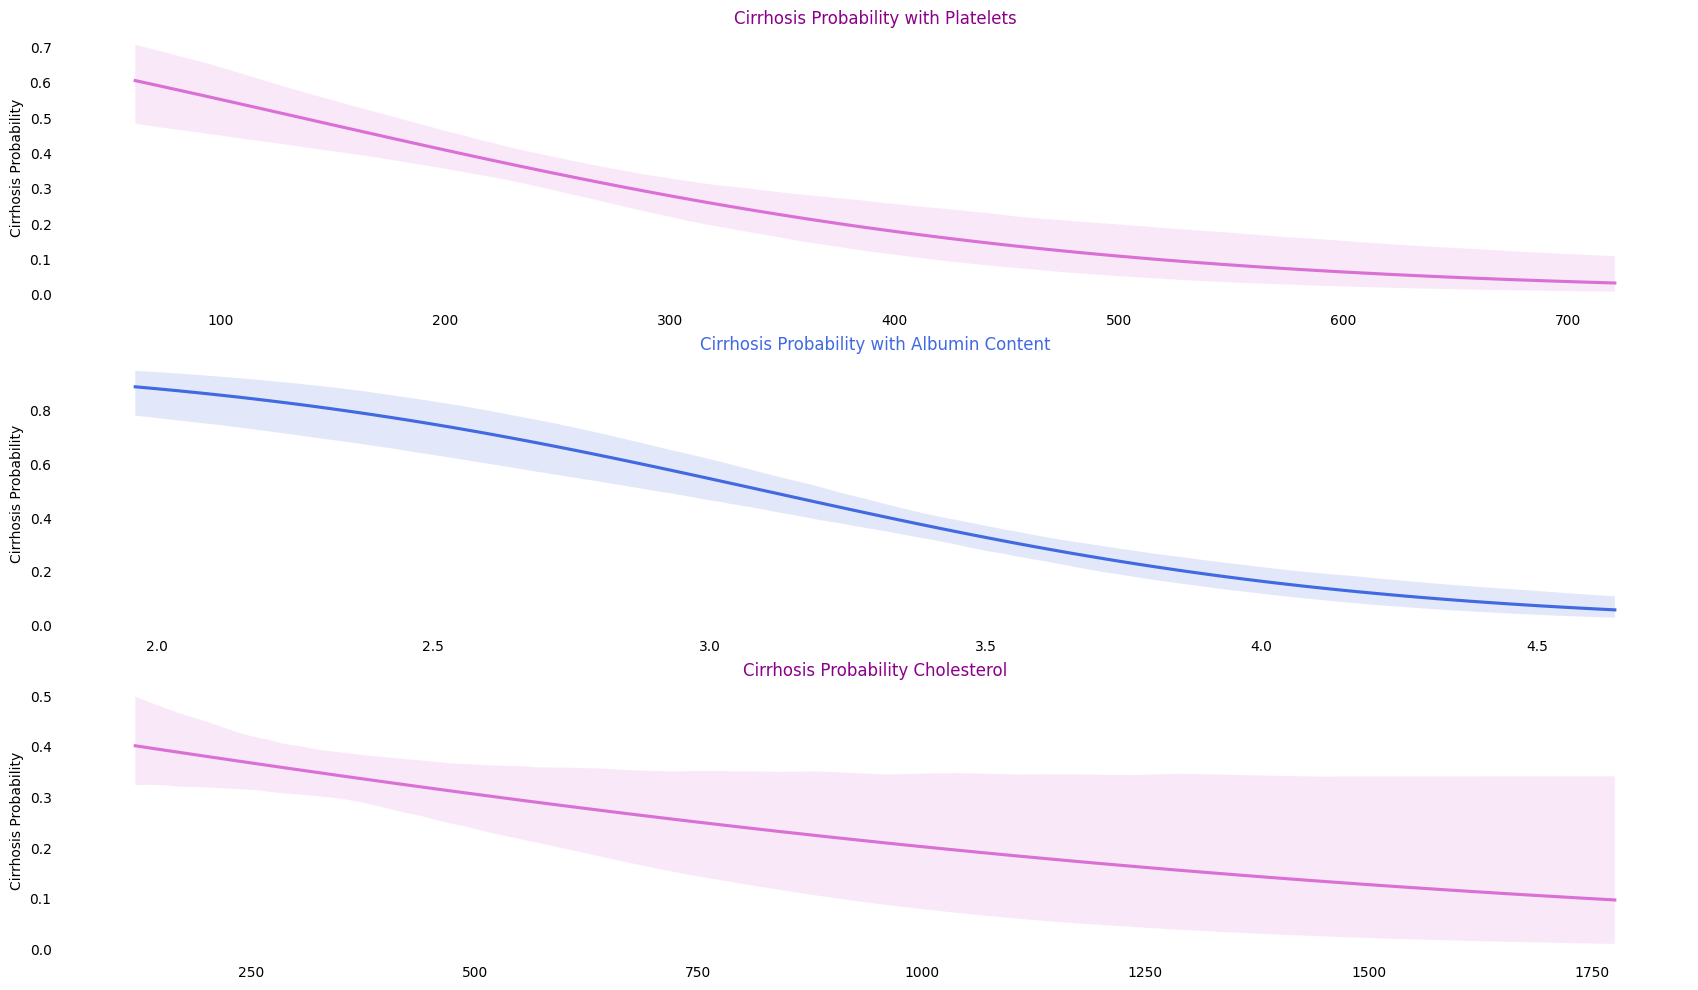

In [1]:
%run preprocessing.ipynb

# Model Selection. 
lets first try out a quick Logestic regression classifier and see how it performs.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression(max_iter=5000, solver='saga')
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  log_model.fit(X_train, y_train)
  score = log_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc)*100,"%")

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.6190476190476191
For Fold 4 the accuracy is 0.6666666666666666
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.6666666666666666
For Fold 7 the accuracy is 0.6904761904761905
For Fold 8 the accuracy is 0.7380952380952381
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.6341463414634146

Logestic Regression Mean Accuracy =  70.32520325203252 %


## Testing and Scores In Logistic Regression and Classification

In [6]:
from sklearn.metrics import classification_report
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.45      0.36      0.40        14

    accuracy                           0.63        41
   macro avg       0.58      0.57      0.57        41
weighted avg       0.62      0.63      0.62        41



## Area Under Curve (AUC) and Receiver Operating Characteristic (ROC)

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], log_model_predict_proba[:,1]))

AUC :  0.6507936507936508


Text(0.5, 1.0, 'Precision Recall Curve for Logistic Regression')

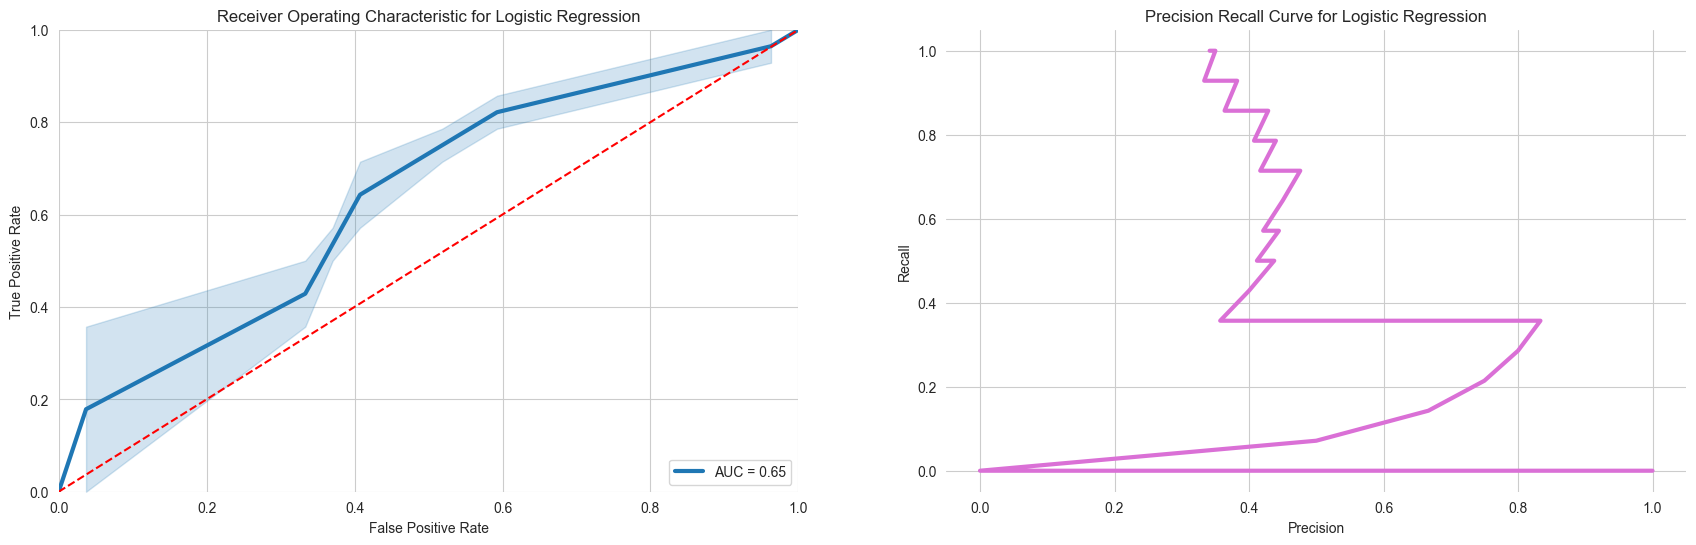

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for Logistic Regression')
sns.lineplot(x=fpr, y=tpr, label='AUC = %0.2f' % roc_auc, linewidth=3)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y.iloc[test_index], log_model_predict_proba[:,1])

plt.subplot(1,2,2)
plt.plot(precision, recall, linewidth=3, color='orchid')
sns.despine(top=True, bottom=True, left=True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve for Logistic Regression')


### After tuning several parameters the logestic regressor model was best able achieve about 70% accuracy and with 0.65 AUC. We might get better scores with some more sophisticated model.